Importing all the required libraries

In [1]:
import numpy as np
import os
import csv
import operator
import time
import pandas as pd
import matplotlib.pyplot as plt

Loading the dataset

In [3]:
os.chdir(r'C:\Users\Diksha Menghmalani\.spyder-py3\programs_py\Data Structures')
with open('mnist_dataset.csv', newline= '') as csv_file2:
    data_lines = csv.reader(csv_file2)
    next(data_lines)
    dataset = list(data_lines)
    matrix = np.array(dataset).astype('int')

Splitting the dataset into training and testing

In [4]:
np.random.shuffle(matrix)
train_matrix, test_matrix = matrix[:8000,:], matrix[8000:,:]

Function for calculating the Euclidean Distance

In [5]:
def CalculateEuclideanDistance(sample1,sample2):
    dist = np.linalg.norm(sample1-sample2)
    return dist

Function for finding K nearest neighbours

In [6]:
def findNeighbours(f_train_matrix,test_data,k):
    #mini =  CalculateEuclideanDistance(test_data, f_train_matrix[0,1:785])
    neighbours_distances = []
    for i in range(len(f_train_matrix)):
        distance_i = CalculateEuclideanDistance(test_data, f_train_matrix[i,1:785])
        #Contains distance values of test data w.r.t all train matrix rows
        neighbours_distances.append((f_train_matrix[i][0],distance_i))
   
    #Sorting neighbours_distances with ascending order 
    neighbours_distances.sort(key=operator.itemgetter(1))
   
    #Choose first "K" distances
    Final_neighbors = []
    for i in range(k):
        Final_neighbors.append(neighbours_distances[i][0])
    return Final_neighbors

Function for finding the best neighbour

In [7]:
def findBestNeighbour(find_neighbours):
    neighbour_count = {}
    #Finding neighbour with maximum occurance
    for x in range(len(find_neighbours)):
        occurrence =find_neighbours[x]
        neighbour_count[occurrence] = neighbour_count.get(occurrence,0)+1
    #Select neighbour with maximum occurance in "find_neighbours" list       
    BestNeighbour = sorted(neighbour_count.items(), key=operator.itemgetter(1), reverse=True)
    return BestNeighbour[0][0]

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900


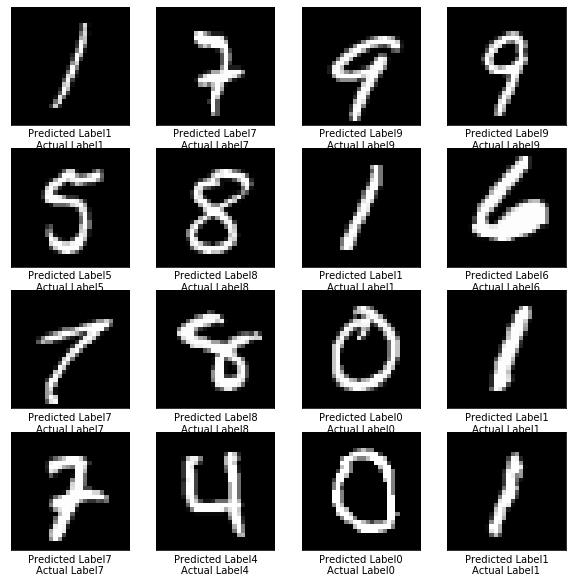

Accuracy: 95.45%
Time Elasped:  351.1568441390991 seconds


In [8]:
plt.figure(figsize=(10, 10))
true_positives = 0
k=1
j = 0
start_time = time.time()
for i in range(len(test_matrix)):
    #finding k neighbours
        find_neighbours=findNeighbours(train_matrix,test_matrix[i,1:785],k)
        #Finding the best neighbour among all 
        best = findBestNeighbour(find_neighbours)
        if(test_matrix[i,0] == best):
            true_positives += 1
        if(i%100 == 0):
            print('iteration', i)
            #print('Actual Number is:' + repr(test_matrix[i,0])+' Predicted Number is:' + repr(best))
            if(j<16):
                plt.subplot(4, 4, j + 1)
                j+=1
                test_matrix_disp = test_matrix[i][1:]
                test_matrix_disp = test_matrix_disp.reshape(28,28)
                plt.imshow(test_matrix_disp,'gray')
                string = 'Predicted Label'+ str(best)+'\n'+ 'Actual Label' + str(test_matrix[i,0])
                plt.xlabel(string)
                plt.xticks([])
                plt.yticks([])
plt.show()
accuracy = (true_positives/float(len(test_matrix))) * 100.0
print('Accuracy: ' + repr(accuracy) + '%')
print('Time Elasped: ', time.time()-start_time, 'seconds')